In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
credit = pd.read_csv('cs-training.csv')

In [3]:
credit.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
credit.isna().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [5]:
len(credit)

150000

In [6]:
credit['MonthlyIncome'].isna().sum()/len(credit)

0.19820666666666667

In [7]:
credit['NumberOfDependents'].isna().sum()/len(credit)

0.02616

In [8]:
credit.dtypes

Unnamed: 0                                int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [9]:
resposta1 = credit['SeriousDlqin2yrs'] == 1
resposta0 = credit['SeriousDlqin2yrs'] == 0

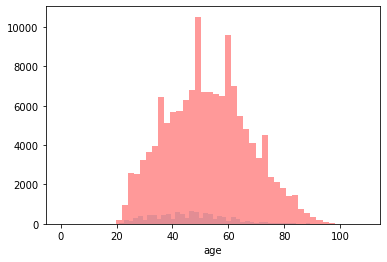

In [10]:
sns.distplot(credit[resposta1]['age'] , color="skyblue", label="1", kde=False)
sns.distplot(credit[resposta0]['age'] , color="r", label="0", kde=False)

C:\Users\ferna\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\ferna\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


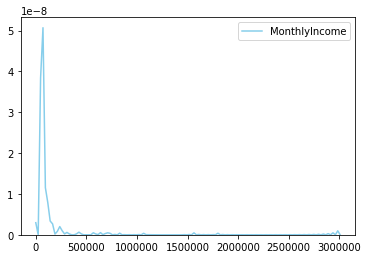

In [11]:
sns.kdeplot(credit['MonthlyIncome'] , color="skyblue")

In [12]:
credit.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


(100, 20000)

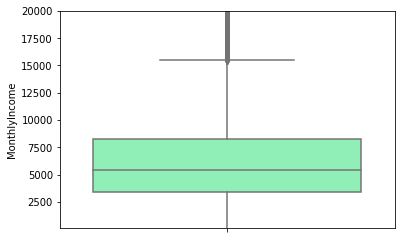

In [13]:
sns.boxplot(y="MonthlyIncome", data=credit,palette='rainbow')
plt.ylim(100,20000)

In [14]:
# Identificando os outliers:

outliers=[]
def detect_outlier(data_1):
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    for y in data_1:
        z_score= (y - mean_1)/std_1
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [15]:
outlier_datapoints = detect_outlier(credit['MonthlyIncome'])
print(outlier_datapoints)

[63588.0, 208333.0, 70000.0, 60200.0, 61000.0, 55000.0, 55000.0, 58249.0, 50000.0, 110775.0, 60000.0, 67000.0, 203500.0, 60000.0, 60700.0, 52667.0, 57000.0, 65300.0, 96668.0, 54166.0, 53600.0, 58000.0, 81000.0, 80000.0, 57000.0, 142000.0, 70000.0, 51250.0, 74872.0, 86980.0, 76613.0, 78500.0, 73000.0, 100000.0, 60000.0, 50440.0, 75000.0, 57000.0, 71950.0, 53800.0, 100000.0, 88333.0, 80176.0, 77170.0, 50000.0, 251608.0, 128000.0, 235000.0, 70833.0, 52000.0, 131350.0, 78000.0, 57891.0, 97336.0, 148000.0, 125000.0, 77274.0, 69000.0, 54400.0, 52500.0, 63500.0, 52833.0, 261666.0, 80416.0, 82000.0, 53000.0, 56944.0, 59000.0, 82000.0, 218674.0, 120000.0, 53000.0, 50550.0, 58333.0, 68000.0, 85000.0, 60000.0, 50000.0, 120000.0, 85000.0, 65000.0, 87700.0, 78000.0, 86537.0, 54000.0, 65000.0, 250000.0, 54166.0, 70575.0, 65450.0, 582369.0, 141500.0, 159791.0, 629000.0, 73728.0, 57195.0, 57200.0, 68500.0, 62500.0, 112100.0, 50000.0, 77000.0, 125000.0, 62500.0, 150300.0, 160000.0, 75000.0, 84279.0, 28

In [16]:
len(outlier_datapoints)

321

In [17]:
for i in outlier_datapoints:
    credit.loc[(credit["MonthlyIncome"] == i), 'flag'] =1

In [18]:
credit['flag'].value_counts()

1.0    321
Name: flag, dtype: int64

In [19]:
mask = credit['flag'] != 1
credit_sem_outliers = credit[mask]

In [20]:
corr=credit_sem_outliers.corr()

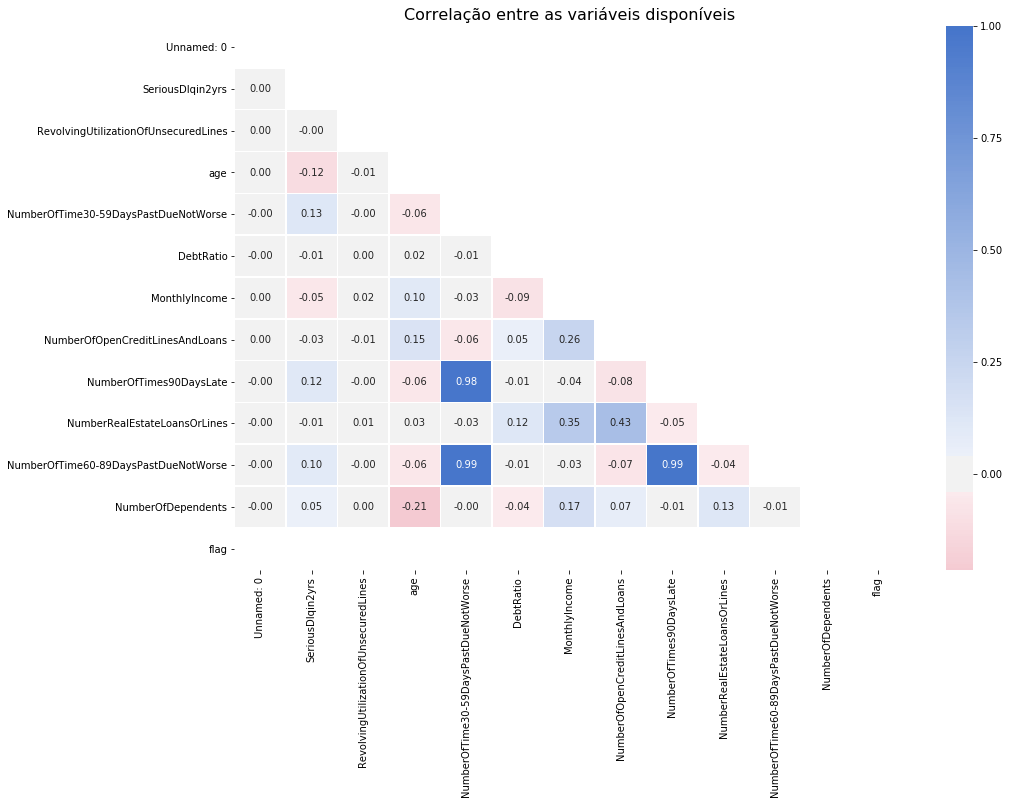

In [21]:
def correlation_matrix(corr, title=""):
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    plt.subplots(figsize=(15, 10))
    cmap = sns.diverging_palette(6, 255, as_cmap=True)
    
    chart = sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=.5, annot=True, fmt='.2f')
    plt.title(title, fontsize=16)
    
    return chart

corr_plot = correlation_matrix(corr, title='Correlação entre as variáveis disponíveis')
plt.savefig('correlacao.png')

In [27]:
credit_sem_outliers.drop('flag', axis=1, inplace=True)

C:\Users\ferna\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# 1ª tentativa: eliminando os nulos:

In [28]:
credit_sem_outliers.isna().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [29]:
credit_drop = credit_sem_outliers.dropna()

In [30]:
credit_drop.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0


## Separando em treino e teste:

In [86]:
train, test = train_test_split(credit_drop, test_size=0.3)

In [87]:
mask2 = train['SeriousDlqin2yrs'] == 0 
train_balanceado_0 = train[mask2][:5000] 

In [88]:
mask3 = train['SeriousDlqin2yrs']  == 1 
train_balanceado_1 = train[mask3][:5000] 

In [89]:
train_balanceado = pd.concat([train_balanceado_0, train_balanceado_1], axis=0, sort=False)

In [90]:
X_train = train_balanceado.drop('SeriousDlqin2yrs',axis=1)
y_train = train_balanceado['SeriousDlqin2yrs']

X_test = test.drop('SeriousDlqin2yrs',axis=1)
y_test = test['SeriousDlqin2yrs']

### Aplicando regressão logística:

In [36]:
from sklearn.linear_model import LogisticRegression

In [91]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [92]:
predictions_reglog = logmodel.predict(X_test)

In [93]:
reg_cm=confusion_matrix(y_test,predictions_reglog)
print(reg_cm)

[[28810  4628]
 [ 1009  1538]]


In [94]:
accuracy_score(y_test,predictions_reglog)

0.843351396415173

In [95]:
f1_score(y_test,predictions_reglog, average='weighted')

0.871402877323172

In [96]:
matthews_corrcoef(y_test,predictions_reglog)

0.31677589839420145

### Árvore de decisão

In [99]:
0.05*len(train_balanceado)

500.0

In [100]:
dtree = DecisionTreeClassifier(min_samples_leaf=500)

In [101]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=500, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [102]:
predictions_tree = dtree.predict(X_test)

In [104]:
confusion_matrix(y_test,predictions_tree)

array([[24049,  9389],
       [  612,  1935]], dtype=int64)

In [105]:
accuracy_score(y_test,predictions_tree)

0.7220786438793942

In [106]:
f1_score(y_test,predictions_tree, average='weighted')

0.7890145111432092

In [107]:
matthews_corrcoef(y_test,predictions_tree)

0.264484650846405

### Random forest

In [108]:
rfc = RandomForestClassifier(n_estimators=600, min_samples_leaf=500)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=500, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [109]:
rfc_pred = rfc.predict(X_test)

In [110]:
confusion_matrix(y_test,rfc_pred)

array([[24701,  8737],
       [  619,  1928]], dtype=int64)

In [111]:
accuracy_score(y_test,rfc_pred)

0.7400027789356677

In [112]:
f1_score(y_test,rfc_pred, average='weighted')

0.8019187130358331

In [113]:
matthews_corrcoef(y_test,rfc_pred)

0.2783705178299335

### XGBoost

In [114]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [115]:
import xgboost as xgb

In [125]:
dtrain = xgb.DMatrix(train_balanceado)

In [126]:
xg = xgb.XGBClassifier(n_estimators=100, booster='gbtree', objective='binary:logistic', gamma=0, reg_alpha=0,
                   reg_lambda=1, tree_method='auto', max_depth=3, min_child_weight=1, learning_rate=0.3,
                    subsample=1,
                    colsample_bytree=1,
                    colsample_bylevel=1,
                    )

In [127]:
xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_method='auto', verbosity=1)

In [128]:
xg_pred = xg.predict(X_test)

In [129]:
confusion_matrix(y_test,xg_pred)

array([[26423,  7015],
       [  663,  1884]], dtype=int64)

In [130]:
accuracy_score(y_test,xg_pred)

0.786633319438655

In [131]:
f1_score(y_test,xg_pred, average='weighted')

0.8346412058969207

In [132]:
matthews_corrcoef(y_test,xg_pred)

0.314983314570093

In [141]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(credit.drop(columns = 'SeriousDlqin2yrs', axis=1),
                                                        credit['SeriousDlqin2yrs'],
                                                    test_size=0.20)

In [142]:
dtrain = xgb.DMatrix(credit)

In [143]:
xg = xgb.XGBClassifier(n_estimators=100, booster='gbtree', objective='binary:logistic', gamma=0, reg_alpha=0,
                   reg_lambda=1, tree_method='auto', max_depth=3, min_child_weight=1, learning_rate=0.3,
                    subsample=1,
                    colsample_bytree=1,
                    colsample_bylevel=1,
                    )

In [144]:
xg.fit(X_train1, y_train1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_method='auto', verbosity=1)

In [145]:
xg_pred = xg.predict(X_test1)

In [146]:
confusion_matrix(y_test1,xg_pred)

array([[27758,   300],
       [ 1540,   402]], dtype=int64)

In [147]:
accuracy_score(y_test1,xg_pred)

0.9386666666666666

In [148]:
f1_score(y_test1,xg_pred, average='weighted')

0.924947411249333

In [149]:
matthews_corrcoef(y_test1,xg_pred)

0.3195287597697692

In [180]:
dtrain = xgb.DMatrix(credit)

In [181]:
xg = xgb.XGBClassifier(n_estimators=500, booster='gbtree', objective='binary:logistic', gamma=1, reg_alpha=0,
                   reg_lambda=1, tree_method='auto', max_depth=3, min_child_weight=1, learning_rate=0.001,
                    subsample=1,
                    colsample_bytree=1,
                    colsample_bylevel=1,
                    )

In [182]:
xg.fit(X_train1, y_train1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1,
              learning_rate=0.001, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_method='auto', verbosity=1)

In [183]:
xg_pred = xg.predict(X_test1)

In [184]:
confusion_matrix(y_test1,xg_pred)

array([[27833,   225],
       [ 1660,   282]], dtype=int64)

In [185]:
accuracy_score(y_test1,xg_pred)

0.9371666666666667

In [186]:
f1_score(y_test1,xg_pred, average='weighted')

0.9195413183556401

In [187]:
matthews_corrcoef(y_test1,xg_pred)

0.2618896658230921